## Check beta model posterior calculations

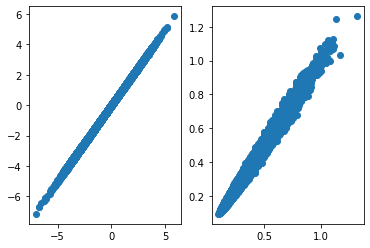

In [31]:
# ~= samples["IP_ratio"].logit().mean(0).squeeze().numpy()
IP_ratio_loc = pyro.param("IP_ratio_loc").detach().cpu().numpy() 
# ~= samples["IP_ratio"].logit().std(0).squeeze().numpy()
IP_ratio_sd = torch.sqrt(pyro.param("IP_ratio_scale")**2 + pyro.param("IP_ratio_corr")**2).detach().cpu().numpy() 

plt.subplot(121); plt.scatter(IP_ratio_loc, samples["IP_ratio"].logit().mean(0).squeeze().cpu().numpy())
plt.subplot(122); plt.scatter(IP_ratio_sd, samples["IP_ratio"].logit().std(0).squeeze().cpu().numpy())

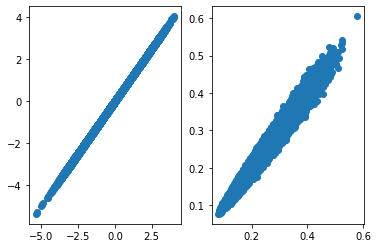

In [57]:
# ~= samples["input_ratio"].logit().mean(0).squeeze().numpy()
input_ratio_loc = pyro.param("input_ratio_loc").detach().cpu().numpy() 
# ~= samples["input_ratio"].logit().std(0).squeeze().numpy()
input_ratio_sd = pyro.param("input_ratio_scale").detach().cpu().numpy() # same as ase_sd

plt.subplot(121); plt.scatter(input_ratio_loc, samples["input_ratio"].logit().mean(0).squeeze().cpu().numpy())
plt.subplot(122); plt.scatter(input_ratio_sd, samples["input_ratio"].logit().std(0).squeeze().cpu().numpy())

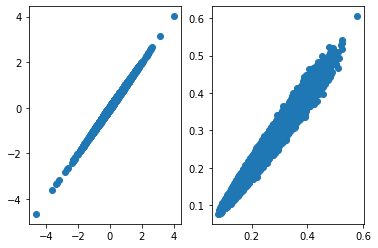

In [45]:
pred_ratio = torch.logit(torch.tensor(dat_here["pred_ratio"].to_numpy(), device = device))
ase_loc = (pyro.param("input_ratio_loc") - pred_ratio).detach().cpu().numpy() 
ase_sd = pyro.param("input_ratio_scale").detach().cpu().numpy() 

effect_size = torch.logit(samples["input_ratio"]) - pred_ratio
dat_here["effect_mean"] = effect_size.mean(0).squeeze().cpu().numpy()
dat_here["effect_std"] = effect_size.std(0).squeeze().cpu().numpy()

plt.subplot(121); plt.scatter(ase_loc, dat_here["effect_mean"])
plt.subplot(122); plt.scatter(ase_sd, dat_here["effect_std"])

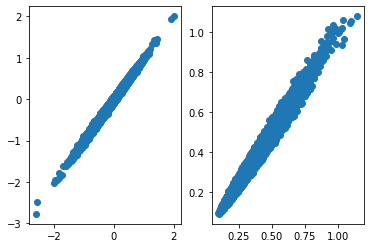

In [36]:
asb_loc = (pyro.param("IP_ratio_loc") - pyro.param("input_ratio_loc")).detach().cpu().numpy() 
asb_sd = (pyro.param("IP_ratio_scale")**2 + (pyro.param("input_ratio_scale") - pyro.param("IP_ratio_corr"))**2 ).sqrt().detach().cpu().numpy() 

effect_size = torch.logit(samples["IP_ratio"]) - torch.logit(samples["input_ratio"])
dat_here["effect_mean"] = effect_size.mean(0).squeeze().cpu().numpy()
dat_here["effect_std"] = effect_size.std(0).squeeze().cpu().numpy()

plt.subplot(121); plt.scatter(asb_loc, dat_here["effect_mean"])
plt.subplot(122); plt.scatter(asb_sd, dat_here["effect_std"])

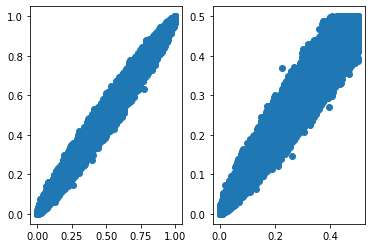

In [51]:
p = (samples["input_ratio"] > samples["IP_ratio"]).float().mean(0).squeeze().cpu().numpy()

z = asb_loc / asb_sd
p_ = scipy.stats.norm().cdf(-z)

q = np.minimum(p,1.-p)
q_ = scipy.stats.norm().cdf(-np.abs(z))

plt.subplot(121); plt.scatter(p, p_)
plt.subplot(122); plt.scatter(q, q_)